# Window Functions

**Topic:**
* How observing a signal segment affects the analysis of the signal.
* Properties of rectangular windows.
* Properties of Hamming windows, etc.

**Learning Objectives:**
* How to mitigate spectral leakage using window functions.

**Libraries and Notebook config:**

In [1]:
from numpy import sin, cos, pi, exp, empty, mean, absolute, angle # Sentrale matematiske funksjoner
from numpy.fft import fft, ifft             # DFT og IDFT
import numpy as np                          # Importer funksjonalitet fra numpy biblioteket med prefiks "np"
import matplotlib.pyplot as plt             # Importer pyplot modulen i matplotlib med prefiks "plt"
import scipy.signal as sig          # Importerer funksjonalitet for å generere en rekke vindusfunksjoner
from scipy.io import loadmat                # Lesing av data fra '.mat' fil



### Introduction:

In problem 1, we looked at the cause of spectral leakage. In this problem, we will take a closer look at how spectral leakage can be explained mathematically and how it can be mitigated.

#### "Standard" DFT and Rectangular Windows

The basis for calculating the Discrete Fourier Transform (DFT) of a digital signal $ x[n] $ is always to select a segment of the signal with a finite length of $ N $ samples. One way to describe this operation is to say that the signal $ x[n] $ is mixed with a **rectangular window function** $ w_r[n] $ to produce the signal segment $ x_w[n] $.

$$ w_r[n] = 
\begin{cases}
1,\ \ 0\leq n < N \\
0,\ \ \text{else}
\end{cases}
$$

$$ x_w[n] = x[n] \cdot w_r[n]$$

An example of this is illustrated in the figure below for the sinusoidal signal $ x[n] = \cos\left(\frac{\pi}{20} \cdot n \right) $.

![](Figurer/Oppg3fig1.png)

In the example above, a digital signal $ w_r[n] $ is multiplied by a sinusoidal sequence $ x[n] $. This leads to amplitude modulation, and the *window function* $ w_r[n] $ is frequency-shifted. If we know the frequency content of the window function $ w_r[n] $, we can then easily calculate the frequency content of the signal segment $x_w[n] $.

#### Rectangular Windows in the Frequency Domain

To get a complete overview of the frequency composition of a rectangular window, we take the Discrete-Time Fourier Transform (DTFT) of a rectangular window function $ w_r[n] $ with a length of $ N $ samples:

$$
\begin{align}
W_r(\hat{\omega}) &= DTFT(w_r[n])\\
&= \sum_{n=-\infty}^{\infty} e^{-j\hat{\omega}n} \cdot w_r[n]\\
&= \sum_{n=0}^{N-1} e^{-j\hat{\omega}n} \cdot 1 \\
\end{align}
$$

This sum can be simplified by recognizing it as a geometric series and applying Euler’s formula, which allows us to compactly represent complex exponentials. The result, known as the Dirichlet formula, describes the frequency response of a rectangular window:

$$
W_r(\hat{\omega})= e^{-j\hat{\omega}\frac{N-1}{2}}\cdot \frac{\sin(N \cdot \hat{\omega}\ /\ 2)}{\sin(\hat{\omega}\ /\ 2)}
$$

The two-sided frequency spectrum $ \left|W_r(\hat{\omega})\right| $ of a rectangular window function with length $ N=16 $ is shown in the figure below. It is evident that the frequency spectrum consists of a "main lobe" and several "side lobes," and the difference in level between the main lobe and side lobes indicates the amount of spectral leakage.

<img src="Figurer/Oppg3fig2.png" style="width: 60%" />

The frequency spectrum of a finite-length segment of a sinusoidal wave with length $ N $ samples will therefore be composed of two frequency-shifted copies of the spectrum shown in the figure above. This is illustrated with an animation.

![](Figurer/windowing_compressed.gif)

To reduce spectral leakage, we apply windowing functions that taper the edges of the signal segment. While the rectangular window cuts off abruptly, causing sharp transitions that introduce spectral leakage, alternative window functions may smooths edges, reducing the contribution of unwanted frequencies (side lobes). This results in a clearer separation of frequency components in the transform. Ideally, the frequency content of such a window function would be a delta pulse at $ \hat{\omega} = 0$. However, since this is impossible to achieve unless the window function has infinite length ($w[n] = 1, \ \ \ -\infty < n < \infty $), alternative methods must be found to approximate the ideal frequency content. One of the most popular window functions is known as the *Hamming window*.

### Hamming Window

A Hamming window is a window function that scales down the values of the samples at the beginning and end of the segment, thereby reducing the "jumps" at the start and end of the window. The expression for an $ N $-point Hamming window $ w_h[n] $ is given below:

$$ w_h[n] = 0.54 - 0.46 \cdot \cos \left(2\pi \frac{n}{N} \right) $$

Below, you can see how a Hamming window is used to weight a sinusoidal signal before performing the Fourier transform. Here, the signal $ x_w[n] $ is used as input to a DFT.

![](Figurer/Hamming_Windowing.png)

The frequency content of this window function is quite different from that of rectangular windows, and it has a level difference between the main lobe and side lobes of 41 dB. The code cell below uses a built-in function in the `scipy.signal` module to generate a Hamming window with length $ N=16 $ and plots the frequency content on a ***logarithmic scale***. You can read more about the various window functions available in `scipy.signal` [here](https://docs.scipy.org/doc/scipy/reference/signal.windows.html?highlight=windows#module-scipy.signal.windows).


To summarize, window functions like the Hamming window help reduce spectral leakage by smoothing the signal, which reduces the level of side lobes in the frequency domain, with the tradeoff of widening the main lobe. For most purposes, this results in a cleaner frequency representation.

<!--
# IN norwegian: 
### Introduksjon:

I oppgave 1 så vi på årsaken til at spektral lekkasje oppstår. I denne oppgaven skal vi se nærmere på hvordan spektral lekkasje kan forklares matematisk, og hvordan det kan motvirkes.

#### "Vanlig" DFT og rektangulære vindu

Basisen for å utregne Diskrét Fouriertransformasjon av et digitalt signal $x[n]$ er alltid å velge et utdrag av signalet med endelig lengde $N$ sampler. Én måte å beskrive denne operasjonen på er å si at signalet $x[n]$ mikses med en **rektangulær vindusfunksjon** $w_r[n]$ for å produsere signalutklippet $x_w[n]$.

$$ w_r[n] = 
\begin{cases}
1,\ \ 0\leq n < N \\
0,\ \ \text{ellers}
\end{cases}
$$

$$ x_w[n] = x[n]\cdot w_r[n]$$

Et eksempel på dette er illustrert i figuren nedenfor for sinussignalet $x[n] = \cos\left(\frac{\pi}{20}\cdot n \right)$.

![](Figurer/Oppg3fig1.png)

I eksempelet ovenfor multipliseres altså et digitalt signal $w_r[n]$ med en sinussekvens $x[n]$. Dette fører til amplitudemodulasjon, og *vindusfunksjonen* $w_r[n]$ blir frekvensforskjøvet. Dersom vi kjenner frekvensinnholdet til vindusfunksjonen $w_r[n]$, kan vi da enkelt regne ut frekvensinnholdet til signalutdraget $x_w[n]$. 

#### Rektangulære vindu i frekvensdomenet

For å få full oversikt over frekvenskomposisjonen til et rektangulært vindu, tar vi Diskret-Tids Fourier Transformasjon (DTFT) av en rektangulær vindusfunksjon $w_r[n]$ med lengde $N$ sampler:

$$
\begin{align}
W_r(\hat{\omega}) &= DTFT(w_r[n])\\
&= \sum_{n=-\infty}^{\infty} e^{-j\hat{\omega}n}\cdot w_r[n]\\
&= \sum_{n=0}^{N-1} e^{-j\hat{\omega}n}\cdot 1 \\
\end{align}
$$

Dette kan forenkles videre ved å benytte formelen for geometrisk rekkeutvikling og Eulers formel. Resultatet er kjent som Dirichlet-formelen:

$$
W_r(\hat{\omega})= e^{-j\hat{\omega}\frac{N-1}{2}}\cdot \frac{\sin(N \cdot \hat{\omega}\ /\ 2)}{\sin(\hat{\omega}\ /\ 2)}
$$

Det tosidige frekvensspekteret $\left|W_r(\hat{\omega})\right|$ til en rektangulær vindusfunksjon med lengde $N=16$, ser du i figuren nedenfor. Det er synlig at frekvensspekteret består av en "hovedlobe" og flere "sidelober", og differansen i nivå mellom hovedlobe og sidelobe forteller noe om hvor mye spektral lekkasje som oppstår.


<img src="Figurer/Oppg3fig2.png" style="width: 60%" />

Frekvensspekteret til et endelig langt utklipp av en sinusbølge med lengde $N$ sampler vil dermed være sammensatt av to frekvensforskjøvne kopier av frekvensspekteret i figuren ovenfor. Dette er illustrert med en animasjon.

![](Figurer/windowing_compressed.gif)

En effektiv metode for å motvirke spektral lekkasje er ved å vekte signalutklippet med en annen vindusfunksjon som ikke har så "skarpe kanter" som et rektangulært vindu. Ideelt sett skulle frekvensinnholdet til en slik vindusfunksjon vært en deltapuls i $\hat{\omega} = 0$, noe som ville tilsi at den ikke har noe variasjon over tid. Da dette er umulig å få til så lenge vindusfunksjonen ikke kan ha uendelig lengde, må man finne andre metoder å tilnærme seg ideelt frekvensinnhold. Én av de mest populære vindusfunksjonene er kjent som *hammingvindu*.

### Hammingvindu

Et hammingvindu er en vindusfunksjon som nedskalerer verdien til samplene i starten og slutten av utklippet, og dermed reduserer "sprang" i begynnelsen og slutten av vinduet. Uttrykket for et $N$-punkts hammingvindu $w_h[n]$ er gitt nedenfor. 

$$w_h[n] = 0.54 - 0.46\cdot\cos \left(2\pi  \frac{n}{N} \right)$$

Nedenfor ser du hvordan et hammingvindu vil brukes til å vekte et sinussignal i forkant av fouriertransformasjonen. Her vil det være signalet $x_w[n]$ som brukes som input til en DFT.


![](Figurer/Hamming_Windowing.png)


Frekvensinnholdet til denne vindusfunksjonen er ganske forskjellig fra rektangulære vindu, og har en nivåforskjell mellom hovedlobe og sidelobe på ? dB. Kodecellen nedenfor bruker en innebygd funksjon i modulen `scipy.signal` til å generere et hammingvindu med lengde $N=16$, og plotter frekvensinnholdet i ***logaritmisk skala***. Du kan lese mer om de ulike vindusfunksjonene tilgjengelig i `scipy.signal` [her](https://docs.scipy.org/doc/scipy/reference/signal.windows.html?highlight=windows#module-scipy.signal.windows).
-->

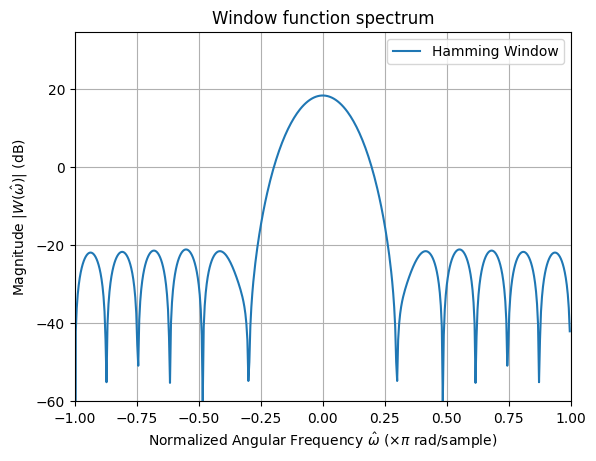

In [2]:
# Parametre
N = 16           # Lengde på signalvindu
DTFT_res = 500   # Oppløsning på "DTFT"-kurven

# Utregning av frekvensinnhold "W_f" og frekvens-akse "f"
w_n = sig.windows.hamming(N)

W_f = np.fft.fft(w_n, n=DTFT_res)
W_f = np.fft.fftshift(W_f) # Sentrerer DFT rundt 0.

f = np.fft.fftfreq(DTFT_res) # Svingninger per sample
f = np.fft.fftshift(f)

# Plotting av figur
plt.close(1)
plt.figure(1)
plt.plot(f*2, 20*np.log10(abs(W_f)), label="Hamming Window")
plt.xlabel(r'Normalized Angular Frequency $\hat{\omega}\ (\times \pi\ $rad/sample$)$')
plt.ylabel('Magnitude $ | W( \\hat{\\omega} )| \\text{ (dB)}$')
plt.title(r'Window function spectrum')
plt.xlim([-1, 1])
plt.ylim(ymin = round(np.log10(np.real(W_f[int(DTFT_res/2)]))-4)*20)
plt.grid(True)
plt.legend()

## The task:

The file `Oppgave3.mat` contains a signal labeled `'x[n]'`. The code cell below loads the relevant data from the `.mat` file, stores it in the variable `x_n`, and creates a bar chart of the signal.

Text(0.5, 1.0, '$x[n]$')

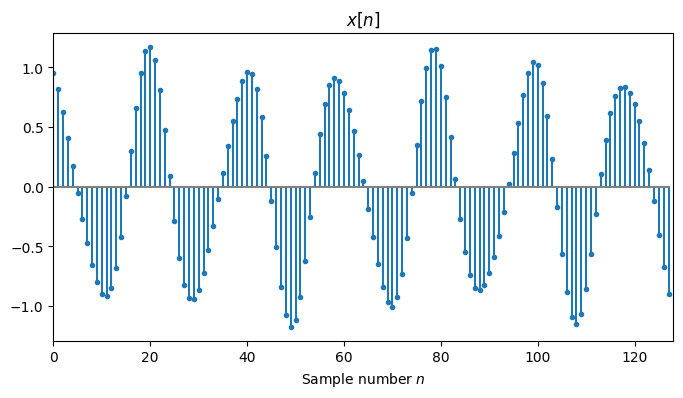

In [3]:
data = loadmat('Data/Oppgave3.mat', squeeze_me=True)
xn = data['x[n]']
N = len(xn)
n = np.arange(N)
plt.close(2);plt.figure(2, figsize=(8,4))
plt.stem(n, xn, markerfmt='.', basefmt='grey')
plt.xlim([0, N])
plt.xlabel(r'Sample number $n$')
plt.title(r'$x[n]$')

### a)

Perform calculations in the code cell below so that a new figure shows a representation of the magnitude of the signal's discrete fourier transform $ X[m] $. Taking spectral leakage into accound, is there anything about the magnitude spectrum which may indicate the presence of more than one sinusoid in the signal? Does this match well with what we see in the time plot?


In [4]:
# WRITE YOUR CODE IN THIS CELL:



ANSWER THEORY QUESTIONS HERE:

*PS: [Here](Figurer/task3a_sol.png) is a suggestion of what the magnitude spectrum plot for problem **a)** might look like.*

## b) 
Choose a window function from [`scipy.signal.windows`](https://docs.scipy.org/doc/scipy/reference/signal.windows.html) (you can decide which window function yourself) and generate a window with the same length as the signal from the data file. Then, use this window to weight the signal, compute a new DFT of the newly weighted signal, and display a plot of the DFT magnitude in a new figure. Are there any new details in the plot which have made an entry since the plot you created in **a)**?

<!--
# Norwegian below:

## b) 
Velg en vindusfunksjon fra [`scipy.signal.windows`](https://docs.scipy.org/doc/scipy/reference/signal.windows.html) (du velger vindusfunksjon selv), og generer et vindu med samme lengde som signalet fra datafilen. Bruk så dette vinduet til å vekte signalet, regn ut en ny DFT av det vektede signalet, og vis et stolpediagram av DFT-sekvensen i en ny figur. Hvor mange separate sinuskomponenter klarer du å identifisere ut ifra signalets DFT når en vindusfunksjon er tatt i bruk?
-->

In [5]:
# WRITE YOUR CODE IN THIS CELL:

ANSWER THEORY QUESTIONS HERE:

*PS: [Here](Figurer/task3b_sol.png) is a suggestion of what the magnitude spectrum plot for problem **b)** might look like.*